# Tutorial problems for Hilary term week 2

This is the problem set for the final week of the programming segment of the course. I hope you've learned something useful
and enjoyed the process. The problems this week look at some advanced features of NumPy and revisit plotting data before giving you an opportunity to reflect on what you've learned. Next week, you will start looking at the statistics segment of the course.

# NumPy broadcasting, boolean arrays and fancy indexing

We have already looked at some aspects of NumPy, but there are some advanced features that are worth considering.
Remember that so far, we have thought about a NumPy array as a type of collection for data where the data type
is the same for each item (so no mixing strings and numbers, use lists or tuples for that), where the size is
fixed, and where you can have any number of dimensions. Like all collections in Python, we use square brackets
to access parts of arrays and we can make slices with colons. We have seen that *arithmetic operations* 
(like `+` and `**`) and *Ufuncs* (like `np.sin()`) operate elementwise, but that some *reduction* functions 
(like `np.max()`) act on the whole array.

Before exploring more NumPy features, run the next cell to import the module.

In [ ]:
import numpy as np

## Problem 49.1:

NumPy broadcasting happens when arithmetic operations or Ufuncs are applied to arrays of different sizes.
Run the cell below, look at the output and explain your findings in terms of how NumPy handles arithmetic
with different sized arrays.

In [6]:
A = np.array([[1, 2, 3, 4],
              [10, 20, 30, 40],
              [100, 200, 300, 400]])

B = np.array([1, 2, 3, 4])

print(f"A:{A}")
print(f"A's shape: {A.shape}")
print()
print(f"B:{B}")
print(f"B's shape: {B.shape}")

C = A + B

print()
print(f"C = A + B = {C}")
print(f"C's shape: {C.shape}")


A:[[  1   2   3   4]
 [ 10  20  30  40]
 [100 200 300 400]]
A's shape: (3, 4)

B:[1 2 3 4]
B's shape: (4,)

C = A + B = [[  2   4   6   8]
 [ 11  22  33  44]
 [101 202 303 404]]
C's shape: (3, 4)


Explain your findings here.

The addition is performed element-wise, and the smaller array, B is sort of expanded or replicated to fill in the 'missing' rows so that it matches the dimensions of A


## Problem 49.2:

Use the cell below to work out if the order of the arrays matters.

In [5]:
# Your working here.
A = np.array([[1, 2, 3, 4],
              [10, 20, 30, 40],
              [100, 200, 300, 400]])

B = np.array([1, 2, 3, 4])

print(f"A:{A}")
print(f"A's shape: {A.shape}")
print()
print(f"B:{B}")
print(f"B's shape: {B.shape}")

C = B + A

print()
print(f"C = B + A = {C}")
print(f"C's shape: {C.shape}")

A:[[  1   2   3   4]
 [ 10  20  30  40]
 [100 200 300 400]]
A's shape: (3, 4)

B:[1 2 3 4]
B's shape: (4,)

C = B + A = [[  2   4   6   8]
 [ 11  22  33  44]
 [101 202 303 404]]
C's shape: (3, 4)


Does the order matter?

Output is the same, order of the arithmetic operation doesn’t matter

## Problem 49.3

Run the cell below, look at the output and explain your findings in terms of how NumPy handles arithmetic
with different sized arrays.

In [12]:
D = np.array([[1, 2, 3, 4],
              [10, 20, 30, 40],
              [100, 200, 300, 400]])

E = np.array([1, 2, 3],)

print(D)
print(D.shape)
print()
print(E)
print(E.shape)
print()

F = D + E

print(F)
print(F.shape)

[[  1   2   3   4]
 [ 10  20  30  40]
 [100 200 300 400]]
(3, 4)

[1 2 3]
(3,)



ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [13]:
X = np.array([[1, 2, 3, 4],
              [10, 20, 30, 40],
              [100, 200, 300, 400]])

Y = np.array([[1, 2, 3],
             [10, 20, 30]])

print(X)
print(X.shape)
print()
print(Y)
print(Y.shape)
print()

Z = X + Y

print(Z)
print(Z.shape)

[[  1   2   3   4]
 [ 10  20  30  40]
 [100 200 300 400]]
(3, 4)

[[ 1  2  3]
 [10 20 30]]
(2, 3)



ValueError: operands could not be broadcast together with shapes (3,4) (2,3) 

In [9]:
P = np.array([[1, 2, 3, 4],
              [10, 20, 30, 40],
              [100, 200, 300, 400]])

Q = np.array([[1, 2, 3 ],
              [10, 20, 30],
              [100, 200, 300]])

print(P)
print(P.shape)
print()
print(Q)
print(Q.shape)
print()

R = P + Q

print(R)
print(R.shape)

[[  1   2   3   4]
 [ 10  20  30  40]
 [100 200 300 400]]
(3, 4)

[[  1   2   3]
 [ 10  20  30]
 [100 200 300]]
(3, 3)



ValueError: operands could not be broadcast together with shapes (3,4) (3,3) 

Explain your findings here.

From pairs A+B, D+E, P+Q & X+Y, it apppears arrays with different dimensions need to have the same number of columns or rows to be broadcast together, with the other dimension being 1

## Problem 49.4:

Explain the following.

In [14]:
D = np.array([[1, 2, 3, 4],
              [10, 20, 30, 40],
              [100, 200, 300, 400]])

E = np.array([1, 2, 3])

print(D)
print(D.shape)
print()
print(D.T)
print(D.T.shape)
print()
print(E)
print(E.shape)
print()

F = D.T + E

print(F)
print(F.shape)

[[  1   2   3   4]
 [ 10  20  30  40]
 [100 200 300 400]]
(3, 4)

[[  1  10 100]
 [  2  20 200]
 [  3  30 300]
 [  4  40 400]]
(4, 3)

[1 2 3]
(3,)

[[  2  12 103]
 [  3  22 203]
 [  4  32 303]
 [  5  42 403]]
(4, 3)


What's going on?

D.T transposed D so now it has 3 columns, and can be broadcast with E which also has 3 columns

## Problem 50:

NumPy arrays do not have to contain numbers. They can also contain boolean values (`True` or `False` in
python, and the capital T and F is important).

Look at the following cell and think about Boolean logic to explain what the `&`,
`|` and `~` operators do.

In [15]:
L1 = np.array([True, False, True, False])
L2 = np.array([True, True, False, False])

print("L1 & L2:", L1&L2)
print("L1 | L2:",L1|L2)
print("~L1:    ",~L1)

L1 & L2: [ True False False False]
L1 | L2: [ True  True  True False]
~L1:     [False  True False  True]


Your answers here:

& is AND, | is OR, ~ is NOT

## Problem 51:

The main use of Boolean arrays is to "mask" other arrays. This works by using a Boolean array in place
of the index of the array (inside the square brackets).

Run the five cells below, and explain what is happening. (Make sure you have run problems 49 and 50 first,
this uses the same arrays).

In [16]:
print(B)
print(L1)
print(B[L1])

[1 2 3 4]
[ True False  True False]
[1 3]


In [17]:
print(B)
print(L2)
print(B[L2])

[1 2 3 4]
[ True  True False False]
[1 2]


In [18]:
print(F)
print(L1)
print(F[L1])

[[  2  12 103]
 [  3  22 203]
 [  4  32 303]
 [  5  42 403]]
[ True False  True False]
[[  2  12 103]
 [  4  32 303]]


In [19]:
print(F)
print(L2)
print(F[L2])

[[  2  12 103]
 [  3  22 203]
 [  4  32 303]
 [  5  42 403]]
[ True  True False False]
[[  2  12 103]
 [  3  22 203]]


In [20]:
print(F)
print(L1&L2)
print(F[L1&L2]) 

[[  2  12 103]
 [  3  22 203]
 [  4  32 303]
 [  5  42 403]]
[ True False False False]
[[  2  12 103]]


Your explanation here.

The Boolean array 'shaves' itself down to fit the number of columns on the other array, is applied to each column and sort of flips itself to be applied row-wise

## Problem 52.1:

We can construct Boolean arrays using comparison operators like `>`, `==`, or `=<`. Explain what is happening in
the cell below.

In [21]:
A = np.array([[1,     20, 300, 4000],
              [10,  2000,  30,  400],
              [100,    2,   3,   40],
              [1000, 200,   4, 3000]])
print(A >= 20)

[[False  True  True  True]
 [False  True  True  True]
 [ True False False  True]
 [ True  True False  True]]


Write your explanation here.

Each element of A is tested against the consition and returns True if condition is met and False if it is not

## Problem 52.2:

This is normally used to do "fancy indexing" where the Boolean array is used as a mask. Explain what 
is happening here.  

In [22]:
A = np.array([[1,     20, 300, 4000],
              [10,  2000,  30,  400],
              [100,    2,   3,   40],
              [1000, 200,   4, 3000]])
print(A[A >= 20])

[  20  300 4000 2000   30  400  100   40 1000  200 3000]


Write your explanation here.

First it makes a Boolean array out of the conditional statement A>=20, then implicitly applies that array to A, element-to-element since the Boolean array and A are of the same shape. I have no idea why it's flattened into one dimension, though



## Problem 52.3:

Adding `.size` to the end of an array returns the number of elements in the array. Finish the code in the cell
below to count the number of elements smaller than 200 in the array A. Use fancy indexing to do this.

In [25]:
A = np.array([[1,     20, 300, 4000],
              [10,  2000,  30,  400],
              [100,    2,   3,   40],
              [1000, 200,   4, 3000]])

# Finish the line below.
num_elements_smaller_than_200 = (A[A<200]).size

print(num_elements_smaller_than_200, "elements less than 200 in array A")

9 elements less than 200 in array A


# Plotting seismic stations in the UK

The next few problems looks back at how to read data from files, and plot this on a map.
In this case we'll look at the location of the network of broadband seismometers that are
operated by the British Geological Survey. In particular, we will look at the network 
with a "GB" network code.

## Problem 53:

The file `~/data/bgs/stations.csv` contains two columns of data
separated by a comma. The first column contains the station latitude, the second the
station longitude. This file can be read with the NumPy `np.loadtxt` command. Finish the 
code in the cell below to plot a map of station locations. Use red circles in the scatter
plot.


### Why is my graph small and in the corner :(

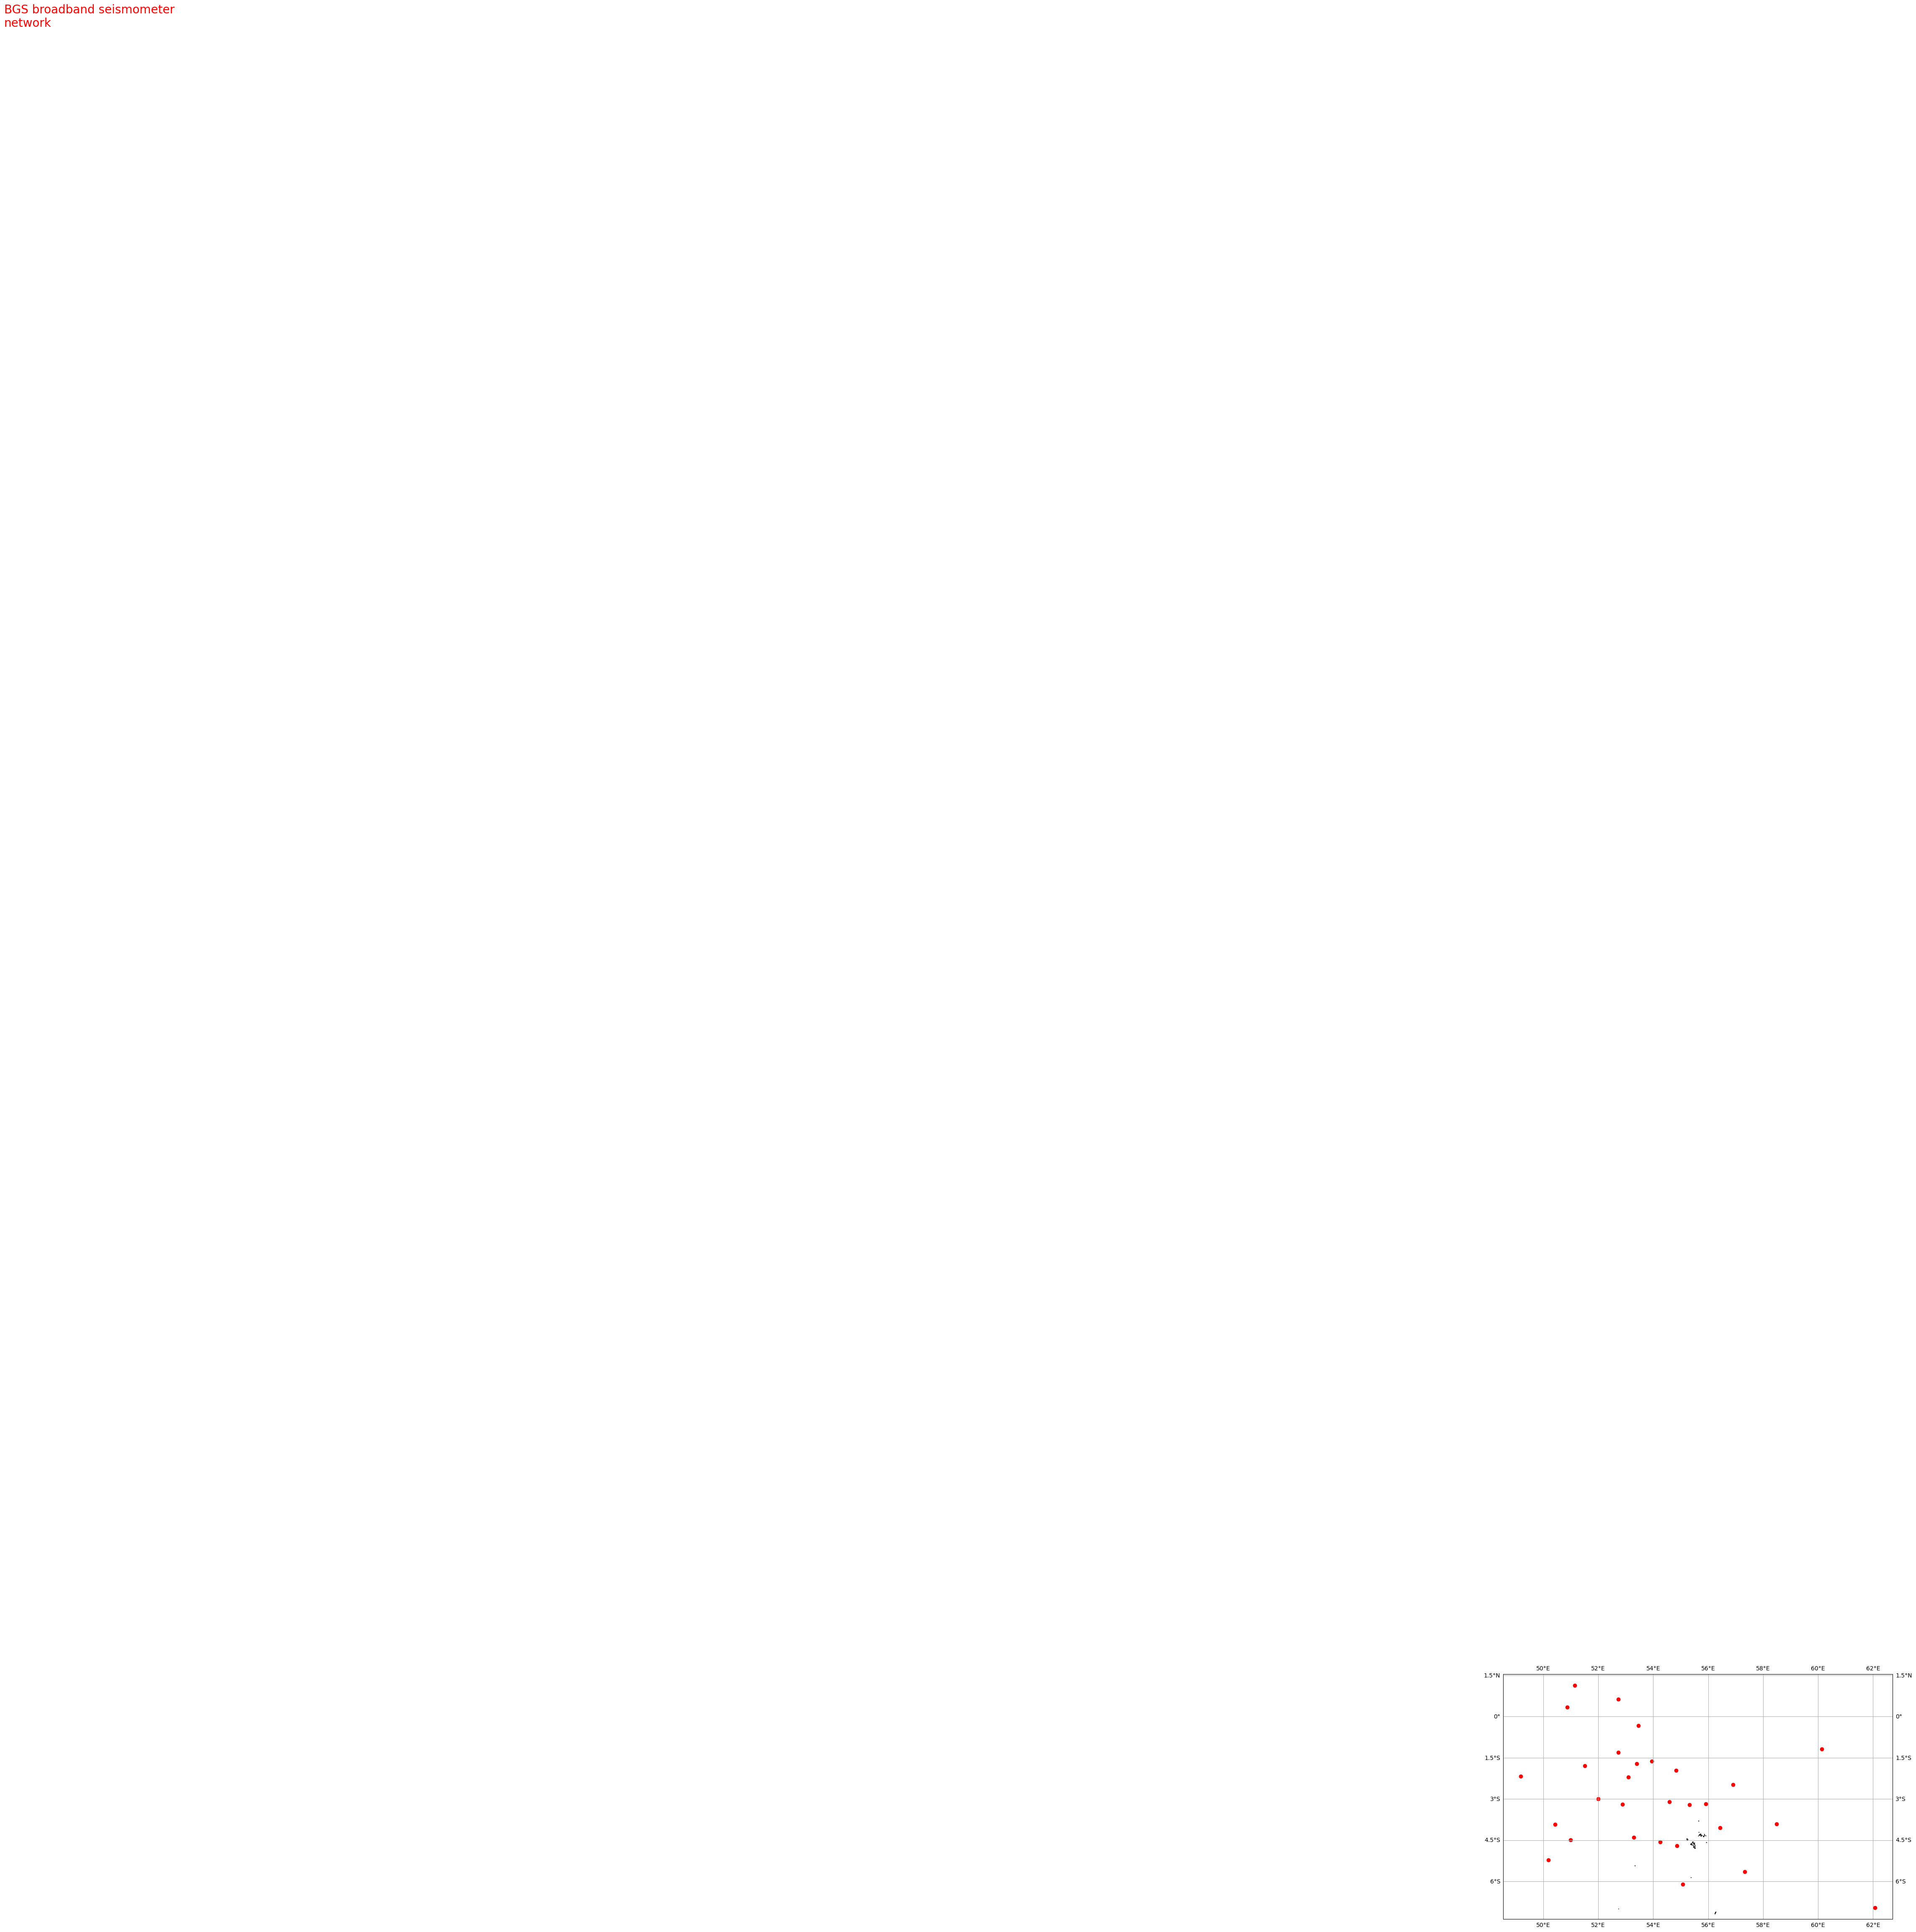

In [52]:
# This is my solution

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

# Read locations here using loadtxt
data = np.loadtxt('../data/bgs/stations.csv', delimiter=',')
latitude = data[:, 0]
longitude  = data[:, 1]
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()),
                       figsize=(12,12)) 

# Plot station locations here using ax.scatter()
ax.scatter(longitude, latitude, color='red', marker='o')
ax.set_xlabel("latitude")
ax.set_ylabel("longitude")

ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)

ax.text(-6.0, 61.5, "BGS broadband seismometer\nnetwork", color='r', fontsize=20)

plt.show()


## Problem 54.1:

The file `~/data/bgs/stations.dat` contains the station locations
as downloaded. This is stored in a different format. Use the shell `head` command to 
print the first 10 lines of this file and explain the format below.

In [37]:
# Enter your shell command here.
!head ../data/bgs/stations.dat

# lat(°) lon(°) elev(m) net.sta
-3.9087  58.4935 70. GB.BIGH
-5.2273  50.1867 209. GB.CCA1
-6.1106  55.0828 239. GB.CLGH
-1.3077  52.7385 203. GB.CWF
-2.4864  56.9125 208. GB.DRUM
-3.9310  50.4353 292. GB.DYA
-3.1875  55.9233 125. GB.EDI
-1.9636  54.8312 337. GB.EDMD
1.1366  51.1476 129. GB.ELSH


Explain the format here:

(this was already here)

Each row relates to a different station with data separated by spaces and the data being the 
station latitude, longitude (both in degrees) the station elevation (in meters) and the station
"name". Lines starting with `#` are comments and do not contain data.

## Problem 54.2:

Reading the data from `stations.dat` is more complex than reading the data from `stations.csv` but you can
also access the station names and put these on a map. In the next cell write some python code to read the data
from `stations.dat` and create a map that also includes the name (from he "net.sta" column) alongside each point.

Hints:
* One way of reading this is using `open()` then looping over the lines. Watch out for comments in the file. You will need to convert numbers from strings to floats with `float()`.
* An alternative approach is to use `np.loadtxt()` with some optional arguments. 
* You will need to use a loop to add the station names (added with ax.text), and you may need to offset these from the points to make them easy to read.

In [53]:
help(ax.text)

Help on method text in module matplotlib.axes._axes:

text(x, y, s, fontdict=None, **kwargs) method of cartopy.mpl.geoaxes.GeoAxes instance
    Add text to the Axes.
    
    Add the text *s* to the Axes at location *x*, *y* in data coordinates.
    
    Parameters
    ----------
    x, y : float
        The position to place the text. By default, this is in data
        coordinates. The coordinate system can be changed using the
        *transform* parameter.
    
    s : str
        The text.
    
    fontdict : dict, default: None
    
        .. admonition:: Discouraged
    
           The use of *fontdict* is discouraged. Parameters should be passed as
           individual keyword arguments or using dictionary-unpacking
           ``text(..., **fontdict)``.
    
        A dictionary to override the default text properties. If fontdict
        is None, the defaults are determined by `.rcParams`.
    
    Returns
    -------
    `.Text`
        The created `.Text` instance.
    
  

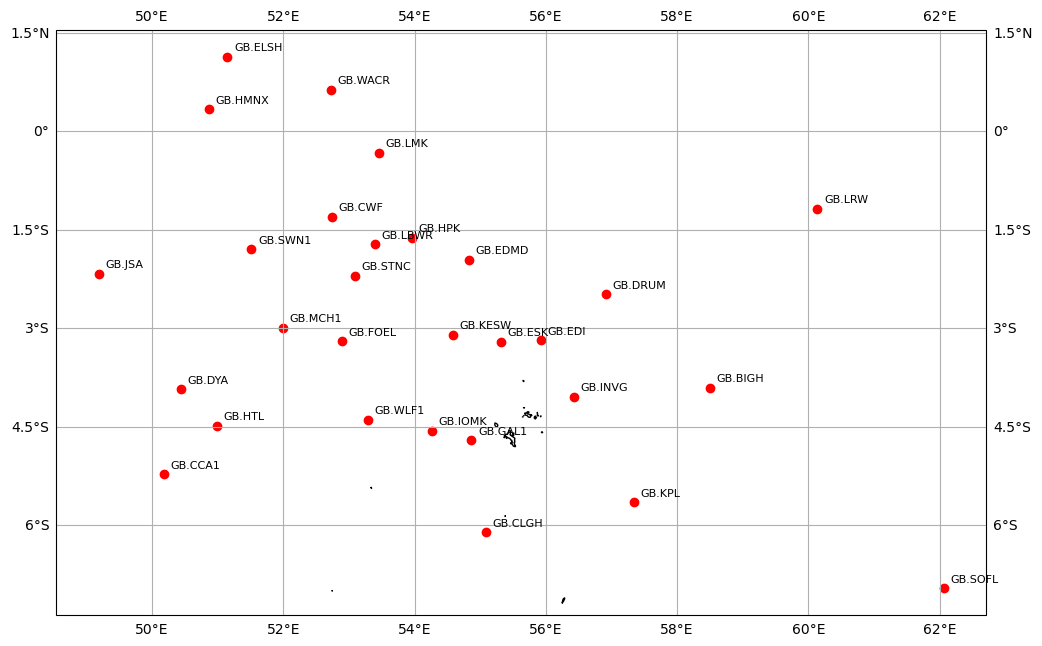

In [56]:
# Your solution here
latitude = []
longitude = []
station_names = []

data_file = open('../data/bgs/stations.dat')

for line in data_file:
    if line.startswith('#'):
        continue  # Skip comments
    values = line.split()
    latitude.append(float(values[0]))
    longitude.append(float(values[1]))
    station_names.append(values[3])

fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(12, 12))

ax.scatter(longitude, latitude, color='red', marker='o')


for latitude , longitude , station_name in zip(latitude, longitude, station_names):
    ax.text(longitude  + 0.1, latitude + 0.1, station_name, color='black', fontsize=8)

ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)

plt.show()

## Problem 55, Ufuncs and graphs:

Another very useful feature of NumPy Ufuncs is that we can use them to plot simple (or even complex)
functions. 

One thing I can never remember is the difference between $\sin^2 x$ and $\sin x^2$, so 
compleate the code below to create a grid of plots for the various ways to square $\sin$ and
$\cos$ to help me rememeber. 

If you also have trouble remembering this, the following may help:
$$\sin^2 x = (\sin x)^2$$
and
$$\sin x^2 = \sin (x^2)$$

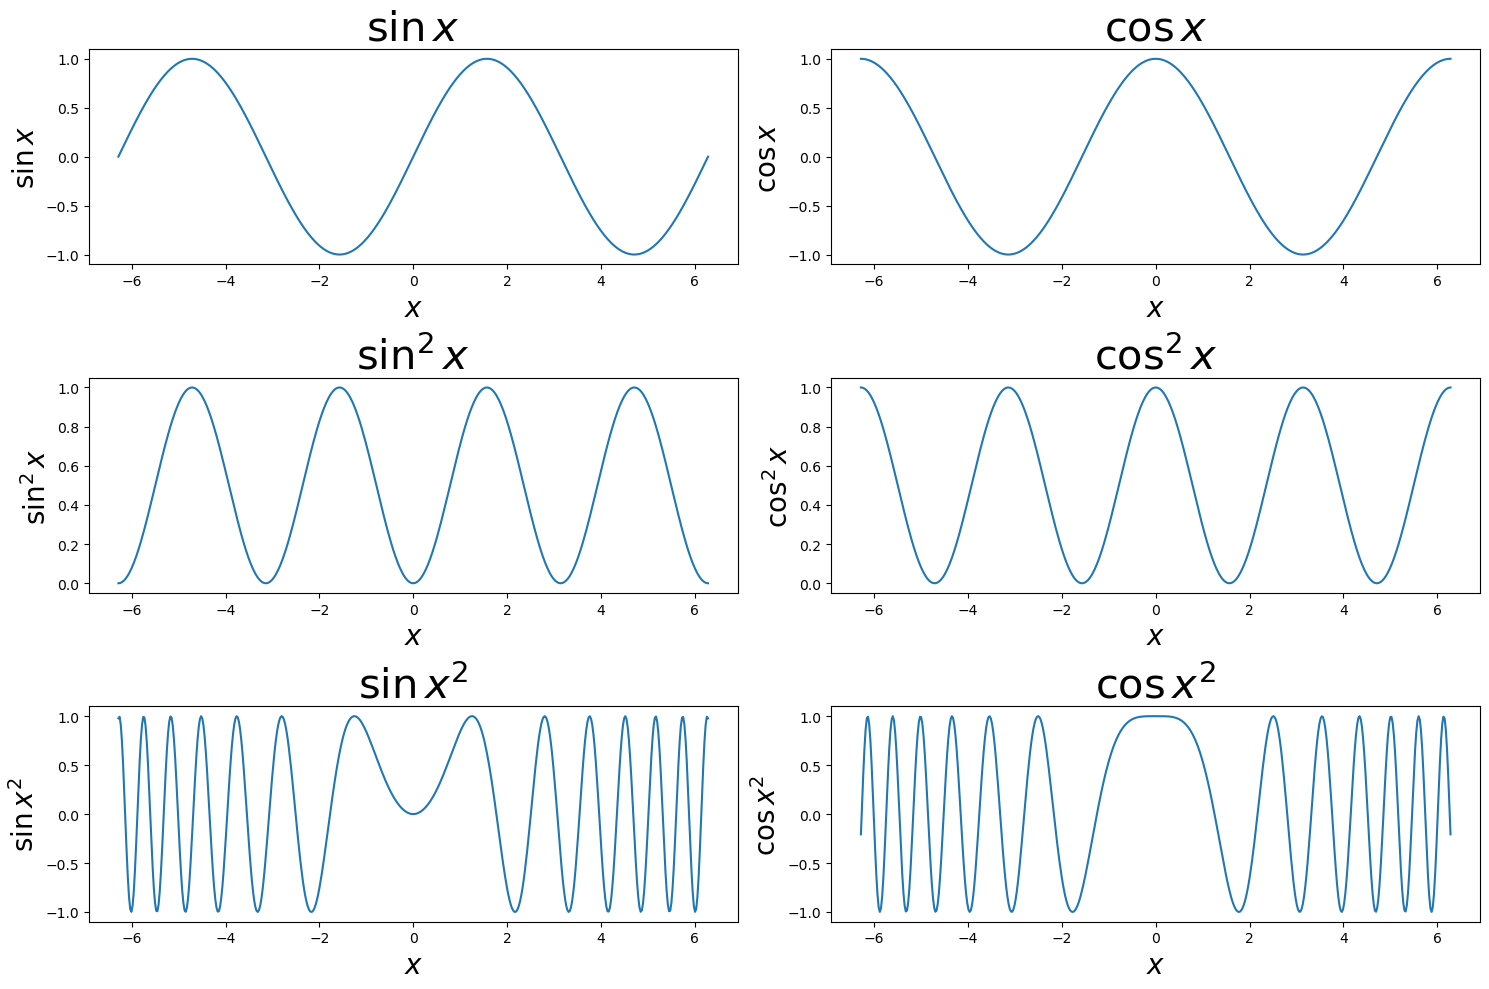

In [57]:
# Fill in the blanks to put the right graphs in the right place

x = np.linspace(-2*np.pi, 2*np.pi, 500)

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

axs[0,0].plot(x, np.sin(x))
axs[0,0].set_xlabel("$x$", fontsize=20)
axs[0,0].set_ylabel("$\sin x$", fontsize=20)
axs[0,0].set_title("$\sin x$", fontsize=30)

# Fill in this blank
axs[1,0].plot(x, np.sin(x)**2)
axs[1,0].set_xlabel("$x$", fontsize=20)
axs[1,0].set_ylabel("$\sin^2 x$", fontsize=20)
axs[1,0].set_title("$\sin^2 x$", fontsize=30)

# Fill in this blank
axs[2,0].plot(x, np.sin(x**2))
axs[2,0].set_xlabel("$x$", fontsize=20)
axs[2,0].set_ylabel("$\sin x^2$", fontsize=20)
axs[2,0].set_title("$\sin x^2$", fontsize=30)


# Fill in this blank
axs[0,1].plot(x, np.cos(x))
axs[0,1].set_xlabel("$x$", fontsize=20)
axs[0,1].set_ylabel("$\cos x$", fontsize=20)
axs[0,1].set_title("$\cos x$", fontsize=30)

# Fill in this blank
axs[1,1].plot(x, np.cos(x)**2)
axs[1,1].set_xlabel("$x$", fontsize=20)
axs[1,1].set_ylabel("$\cos^2 x$", fontsize=20)
axs[1,1].set_title("$\cos^2 x$", fontsize=30)

# Fill in this blank
axs[2,1].plot(x, np.cos(x**2))
axs[2,1].set_xlabel("$x$", fontsize=20)
axs[2,1].set_ylabel("$\cos x^2$", fontsize=20)
axs[2,1].set_title("$\cos x^2$", fontsize=30)


fig.tight_layout()

plt.show()

## Problem 56, reviewing what we have done:

For the penultimate problem, I want you to think about what we have done in the programming part of the course
and any questions about these topics that you may have. Bring these questions to your tutorial!.

The main things I think we have covered are:
* The basic approach of trying to break a problem down into smaller sub-problems that we can tackle, and trying to do this in order to design programs.
* Loops (`for`) and conditionals (`if`) in Python and using these together to count things, and to extract sub-sets of information (for example, from lists).
* Variables and several types of container in python including lists (`[]`), dictionaries (`{}`) and 
NumPy arrays (`array([])`). How to use a loop to iterate through a container.
* Arithmetic operators (`+`, `-`, `*`, `\` and `**`), the `math` module and NumPy Ufuncs.
* Boolean logic, logical operators (`and`, `or`, and `not`), comparison operators (e.g. `<` and `==`) and logic in NumPy.
* Creating functions (with `def`), using functions, the concepts of local variables, function arguments
and return values. The idea that a function give you a way to make a bit of Python do one thing
(where you can describe the thing with a docstring) and reused.
* Creating graphs and maps of data and functions.
* Reading data from files..

Note any questions below!

Write your questions here:

Q1.In the first question here, 
A:[[  1   2   3   4]
 [ 10  20  30  40]
 [100 200 300 400]]
A's shape: (3, 4)

B:[1 2 3 4]
B's shape: (4,)

Are the brackets (row, column) or (column, row)?

Q2.In W9 worksheet,
$$
\mathrm{gcd}(p,q) = 
\begin{cases} 
      p & \mathrm{if}\, q = 0 \\
      \mathrm{gcd}(q, p\mathrm{\%}q)  & \mathrm{if}\, q > 0 
   \end{cases}
$$

Where does the formula gcd(q, p % q) come from?

## Problem 57, 10 things we have not covered:

Although we have covered many things, we have not done everything we could do in Python. Ten things I thought about
teaching, but decided we didn't have time for are listed below. Pick one, and try to describe how it could be useful 
for some branch of the Earth Sciences in the box below.

1. **Object oriented (OO) programming:** this is the "next step" after moving functions into modules. The idea is that 
we need a way to collect data together with functions (because the way the data is stored changes the way you write the functions). What this means is that you can have functions that act on data. We've seen this lots of times (every dot in Python is actually accessing data or a function inside an object) but we've not thought about how to create or use objects. 
2. **Many different types of maps and graphs:** there are loads of different ways to plot data on graphs and maps
using Matplotlib and Cartopy. The best way to get an idea of what is possible is to look at the gallaries at https://matplotlib.org/gallery.html and https://scitools.org.uk/cartopy/docs/latest/gallery/index.html. Both
come with example code which can be used as the basis to make your own maps and graphs with different data.
3. **Linear algebra:** you will cover linear algebra in the maths modules and the numerical methods module
next year, but it is worth knowing that linear algebra (equations with matrices) is the foundation of almost all
numerical computing, and NumPy has high quality linear algebra support.
4. **Numerical methods:** you will cover other numerical methods next year. These
allow you to build numerical models of scientific problems and find models that best fit  data. Numerical
methods are also used to forecast the weather, and make (or lose) money on the stock market. 
5. **Symbolic mathematics:** you are probably used to manipulating equations on paper, but computers
can also do this. The main python module to undertake symbolic mathematics is SimPy, described at 
https://www.sympy.org
6. *Specific Earth Science modules:** there are many python modules and programs designed to process data
of various types. Search google for "Earth Sciences" and "python" to see some examples.
7. **Regular expressions:** we have seen two ways of reading files (using NumPy or looping over the file, one 
line at a time). There is another way of processing text data which can be useful if the format is a little two 
complex to use the NumPy approach, but is not so complex that you must use a full loop over lines. This uses text
processing tools called regular expressions. The `re` module will allow you to do this in Python.
8. **Parallel programming** these days almost all computers have multiple processors. Even mobile phones have 
multiple processors. To take advantage of this for a single program needs parallel programming. This is a complex
area, but there are several ways to do this in Python.
9. **Software development:** we have not discussed the various tools that are available to help manage the creation
of software. This includes version control (I've created all the material for this module on www.github.com) and
tools to automate testing (e.g. pytest). You may also want to think about software ownership and licensing. Who owns
the software you write?
10. **AI, machine learning and "big data":** machine learning is a set of methods used to extract useful information 
from data in an automated way, while artificial intelligence attempts to use this information to make decisions or
undertake tasks in a way that mimics a human. This is an area of computing that is growing very 
quickly. Many methods make use of tools called neural networks (and we have some final year project students 
using these in Oxford). Python has modules that will permit the creation and use of neural networks. Neural 
networks often need lots of data for "training" and if so much data is needed that we need to take special 
approaches to using the data (e.g. it will not fit on one computer) we call this a "big data" problem. 

Write something you have discovered about one of the topics above here.


##### 6.Specific modules: Leaflet and Folium

These are used to make animated maps. Leaflet was designed for JavaScript and Folium lets us use it more easily in Python.
They let us make a map that can be zoomed in/out, lets us input a location and view it on the map, and lets us put markers and other features on the map. We can use something called pandas to overlay different data on the map.